#1

1-C

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics         import accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import io
import gdown
import scipy.io
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

1-C importing dataset

In [ ]:

file_id = "1GRe9yOi-5tno4ew0a4CAgphMLT4mUOeF"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "spam.csv", quiet=False)

df = pd.read_csv("spam.csv", encoding="latin1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

Downloading...
From: https://drive.google.com/uc?id=1GRe9yOi-5tno4ew0a4CAgphMLT4mUOeF
To: /content/spam.csv
100%|██████████| 504k/504k [00:00<00:00, 7.34MB/s]


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


1.C preparing dataset

In [ ]:
np.random.seed(16)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.C define  and fitting ComplementNB from sklearn

In [ ]:
model = ComplementNB(alpha=0.6, norm = True)
model.fit(X_train, y_train)

ComplementNB(alpha=0.6, norm=True)

1.C Train reports (sklearn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       0.98      0.97      0.97       597

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



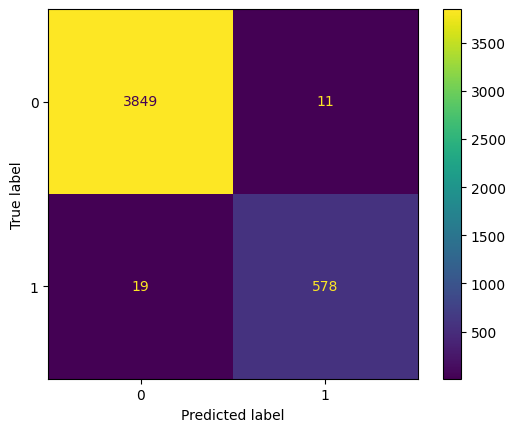

Accuracy: 0.9932690150325331


In [ ]:
actual =y_train
y_pred_train= model.predict(X_train)
print(classification_report(y_train, y_pred_train))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_train, y_pred_train))

1.C Test reports (sklearn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



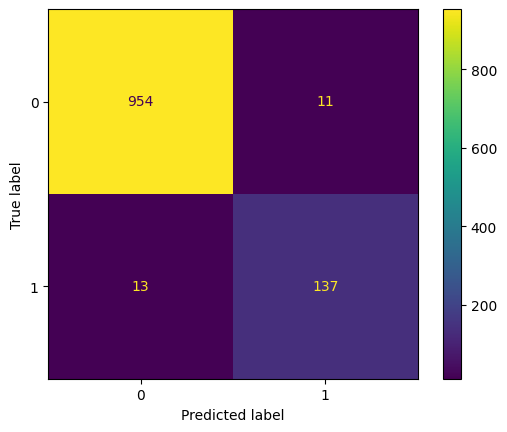

Accuracy: 0.97847533632287


In [ ]:
actual =y_test
y_pred_test= model.predict(X_test)
print(classification_report(y_test, y_pred_test))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_test))

1.C Define and fitting ComplementNB from scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

class ComplementNaiveBayes:
    def fit(self, X, y, alpha=1.0):
        self.classes = np.unique(y)
        self.alpha = alpha
        self.class_log_prior = {}
        self.feature_log_prob = {}

        total_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y != c]
            feature_count = X_c.sum(axis=0)
            smoothed_fc = feature_count + self.alpha
            total_fc = smoothed_fc.sum()

            self.feature_log_prob[c] = np.log(smoothed_fc / total_fc)
            self.class_log_prior[c] = np.log(np.sum(y == c) / total_samples)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        scores = {}
        for c in self.classes:
            score = self.class_log_prior[c] - np.sum(x * self.feature_log_prob[c])
            scores[c] = score
        return max(scores, key=scores.get)

1.C fitting model (Scratch)

In [ ]:

model = ComplementNaiveBayes()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy on SMS Spam Collection: {accuracy:.4f}")

Test Accuracy on SMS Spam Collection: 0.9785


1.C Train Reports (Scratch)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       0.99      0.97      0.98       597

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



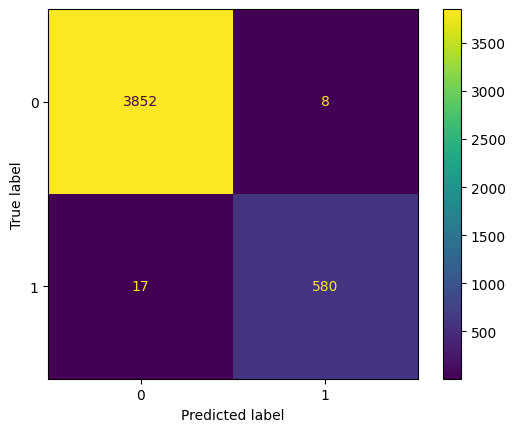

Accuracy: 0.9943908458604442


In [ ]:
actual =y_train
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
y_pred_train= model.predict(X_train)
print(classification_report(y_train, y_pred_train))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_train, y_pred_train))

1.C Test Reports (scratch)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



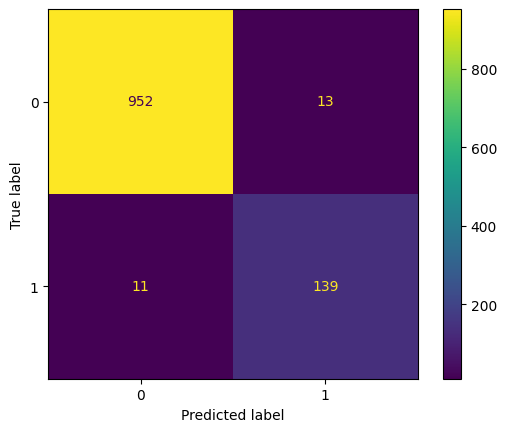

Accuracy: 0.97847533632287


In [ ]:
actual =y_test
if hasattr(X_test, "toarray"):
    X_test = X_test.toarray()
y_pred_test= model.predict(X_test)
print(classification_report(y_test, y_pred_test))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_test))

1.C Define and fitting MultinomialNB from sklearn

In [ ]:
model = MultinomialNB(alpha=0.7)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.7)

1.C Train Reports (sklearn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       0.98      0.98      0.98       597

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457



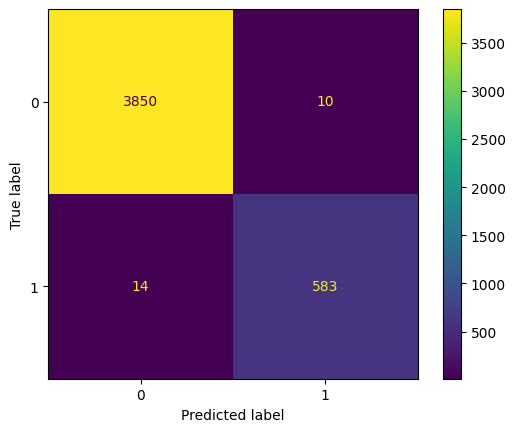

Accuracy: 0.9946152120260264


In [ ]:
actual =y_train
y_pred_train= model.predict(X_train)
print(classification_report(y_train, y_pred_train))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_train, y_pred_train))

1.C Test Reports (sklearn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



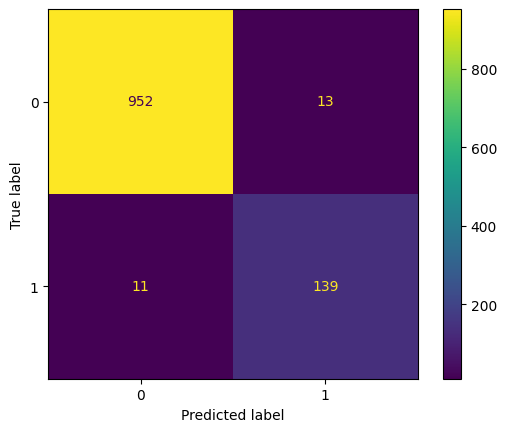

Accuracy: 0.97847533632287


In [ ]:
actual =y_test
y_pred_test= model.predict(X_test)
print(classification_report(y_test, y_pred_test))
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_test))

#2

2. آ )  importng MNIST dataste

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

2. آ ) MinMaxScaler

In [ ]:
X_mn = mnist.data[:10000]
y_mn = mnist.target[:10000]

scaler = MinMaxScaler()
X_mn = scaler.fit_transform(X_mn)

2. ب ) Train and Test Split

In [ ]:
X_mn_train,X_mn_test, y_mn_train,y_mn_test=train_test_split(X_mn,y_mn,test_size=0.3,random_state=16)

2.ج - د) define KNN

1.0
0.973
0.9632857142857143
0.9555714285714285
0.9511428571428572
0.949
0.9432857142857143
0.9388571428571428
0.9355714285714286
0.9342857142857143
0.9312857142857143
0.9281428571428572
0.9261428571428572


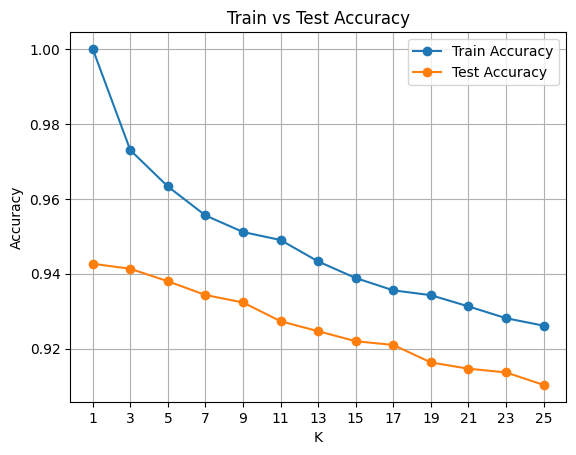

In [ ]:
accuracies_train = []
accuracies_test = []

for k in range(1,27,2):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_mn_train, y_mn_train)
  #train
  y_pred_train = knn_model.predict(X_mn_train)
  acc_train = accuracy_score(y_mn_train, y_pred_train)
  accuracies_train.append(acc_train)
  print(acc_train)
  #test
  y_pred_test = knn_model.predict(X_mn_test)
  acc_test = accuracy_score(y_mn_test, y_pred_test)
  accuracies_test.append(acc_test)
  #print(acc_test)

plt.plot(range(1, 27, 2), accuracies_train, marker='o', label='Train Accuracy')
plt.plot(range(1, 27, 2), accuracies_test, marker='o', label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.grid(True)
plt.xticks(range(1, 27, 2))
plt.legend()
plt.show()


In [ ]:
ACC = (np.array(accuracies_train) - np.array(accuracies_test))*100
ACC

array([5.73333333, 3.16666667, 2.52857143, 2.12380952, 1.88095238,
       2.16666667, 1.86190476, 1.68571429, 1.45714286, 1.7952381 ,
       1.66190476, 1.44761905, 1.58095238])

2. و ) apply PCA to minit aatset

0.973
0.9413333333333334


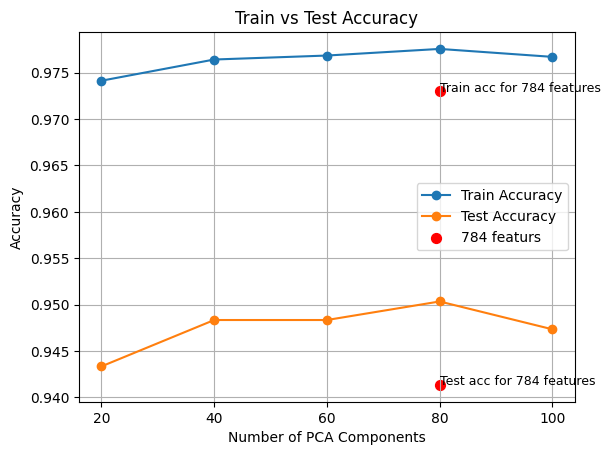

In [ ]:
np.random.seed(16)
accuracies_train_pca = []
accuracies_test_pca = []

for n in range(20, 120, 20):

    pca = PCA(n_components=n)

    pca.fit(X_mn_train)

    X_mn_pca_train = pca.transform(X_mn_train)
    X_mn_pca_test = pca.transform(X_mn_test)


    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_mn_pca_train, y_mn_train)
    #train
    y_pred_train = knn_model.predict(X_mn_pca_train)
    acc_train_pca = accuracy_score(y_mn_train, y_pred_train)
    accuracies_train_pca.append(acc_train_pca)
    #test
    y_pred_test = knn_model.predict(X_mn_pca_test)
    acc_test_pca = accuracy_score(y_mn_test, y_pred_test)
    accuracies_test_pca.append(acc_test_pca)

# k=3 and n = 784
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_mn_train, y_mn_train)
#train
y_pred_train = knn_model.predict(X_mn_train)
acc_train = accuracy_score(y_mn_train, y_pred_train)
print(acc_train)
#test
y_pred_test = knn_model.predict(X_mn_test)
acc_test = accuracy_score(y_mn_test, y_pred_test)
print(acc_test)

plt.plot(range(20, 120, 20), accuracies_train_pca, marker='o', label='Train Accuracy')
plt.plot(range(20, 120, 20), accuracies_test_pca, marker='o', label='Test Accuracy')

plt.scatter([80, 80], [acc_train, acc_test], color='red', s=50, label='784 featurs')

plt.text(80, acc_train, 'Train acc for 784 features', fontsize=9, ha='left')
plt.text(80, acc_test, 'Test acc for 784 features', fontsize=9, ha='left')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.grid(True)
plt.xticks(range(20, 120, 20))
plt.legend()
plt.show()


#3

3.1 importing dataset

In [ ]:
import io
import gdown
import scipy.io
import pandas as pd
file_id = "1nh4eqiNj4CzvF56jp8mos3knabheodw-"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Company_Data.csv", quiet=False)
df_company = pd.read_csv("Company_Data.csv", encoding="latin1")


Downloading...
From: https://drive.google.com/uc?id=1nh4eqiNj4CzvF56jp8mos3knabheodw-
To: /content/Company_Data.csv
100%|██████████| 16.6k/16.6k [00:00<00:00, 27.5MB/s]


3.1 showing 10 sample of dataset

In [ ]:
df_company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


3.2 Data preprocessing

3.2.A missing values

In [ ]:
print(df_company.isnull().values.any())
print(df_company.isnull().sum())

False
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


3.2.B duplicates values

In [ ]:
duplicates = df_company.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


3.2.C Encoding categorical values to numerical values

In [ ]:
# categorical columns:  ShelveLoc, Urban, US
le = LabelEncoder()
df_company['ShelveLoc'] = le.fit_transform(df_company['ShelveLoc'])
df_company['Urban'] = le.fit_transform(df_company['Urban'])
df_company['US'] = le.fit_transform(df_company['US'])

df_company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


3.2.E Encoding categorical values to numerical values

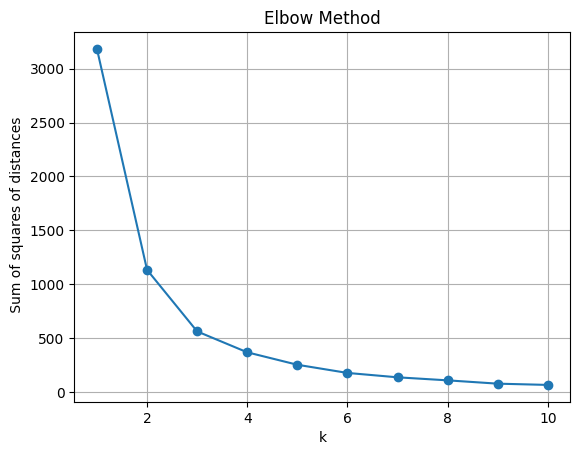

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_array = df_company['Sales'].to_numpy().reshape(-1,1)


inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_array)
    inertias.append(kmeans.inertia_)


plt.plot(K_range, inertias, marker='o')
plt.xlabel('k')
plt.ylabel(' Sum of squares of distances')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_array)

labels = kmeans.labels_
cluster0 = data_array[labels == 0]
cluster1 = data_array[labels == 1]
cluster2 = data_array[labels == 2]
cluster3 = data_array[labels == 3]

cluster_names = {
    0: '0',
    1: '1',
    2: '2',
    3: '3'}
cluster_labels_named = [cluster_names[label] for label in labels]

In [ ]:
df_company['Sales'] = cluster_labels_named
df_company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
5,2,124,113,13,501,72,0,78,16,0,1
6,3,115,105,0,45,108,2,71,15,1,0
7,2,136,81,15,425,120,1,67,10,1,1
8,3,132,110,0,108,124,2,76,10,0,0
9,3,132,113,0,131,124,2,76,17,0,1


3.2.E corrolation matrix

<ipython-input-10-9a763a254205>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_sales.values, y=corr_with_sales.index, palette='coolwarm')


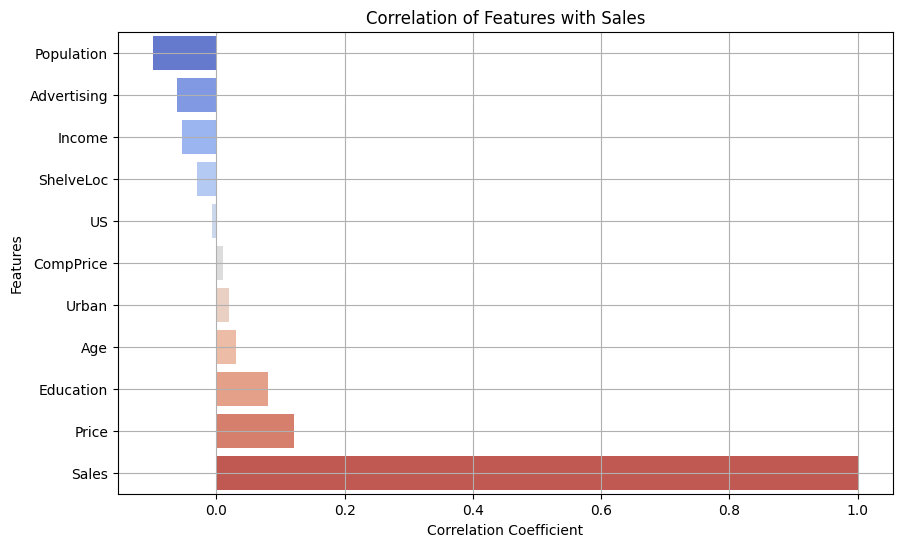

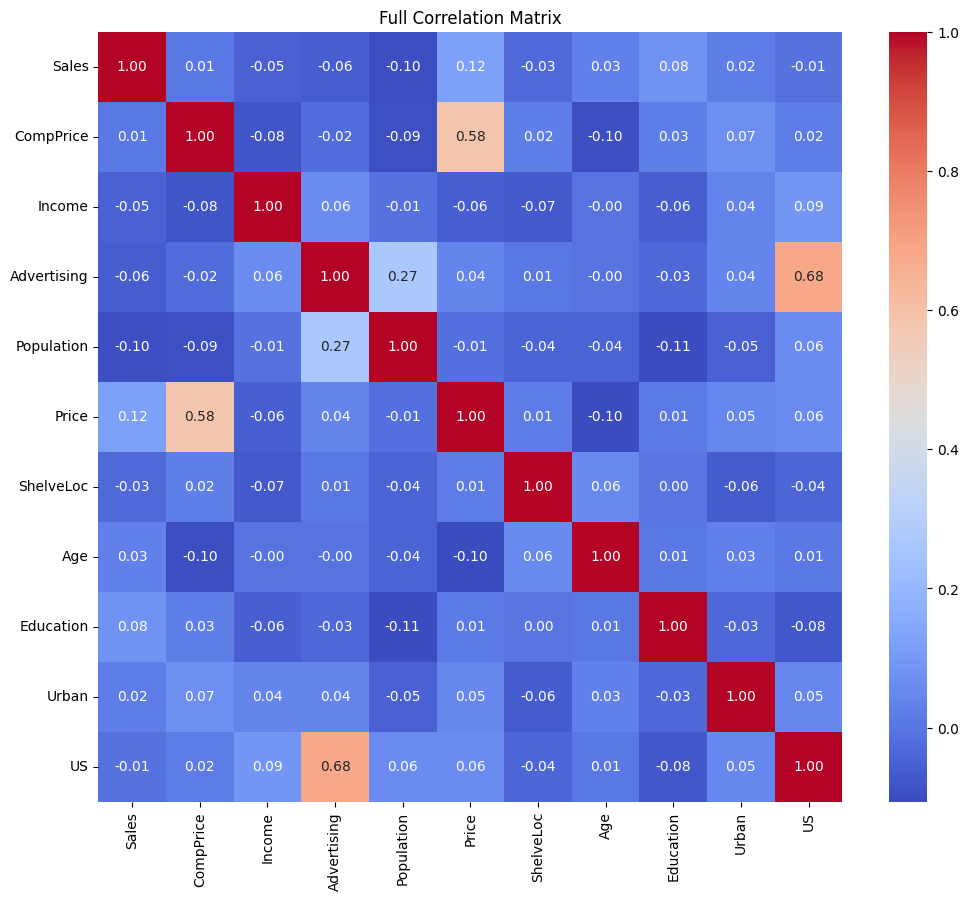

In [ ]:
corr_matrix = df_company.corr()['Sales'].sort_values()

corr_with_sales = df_company.corr()['Sales'].sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_sales.values, y=corr_with_sales.index, palette='coolwarm')
plt.title("Correlation of Features with Sales")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_company.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Full Correlation Matrix")
plt.show()

3.3 Entropy

In [ ]:
def calculate_entropy(y):
  Entropy = []

  if isinstance(y, pd.DataFrame): # if y is a dataframe
    y = y.values

  y1, y2 = y.shape
  for i in range(0,y2):
    classes, counts = np.unique(y[:,i], return_counts=True)
    probabilities = counts / len(y[:,i])
    entropy = -np.sum(probabilities * np.log2(probabilities))
    Entropy.append(entropy)
  return Entropy


#
data = {
    'Feature1': ['A', 'B', 'A', 'A'],
    'Feature2': ['X', 'Y', 'X', 'Z'],
    'Feature3': ['Cat', 'Dog', 'Cat', 'Dog']
}

data = pd.DataFrame(data)

print("Entropy:", calculate_entropy(data))

Entropy: [np.float64(0.8112781244591328), np.float64(1.5), np.float64(1.0)]


3.4 info_gain

In [ ]:
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def info_gain(parent, children):
    total_entropy = entropy(parent)
    total_len = len(parent)

    weighted_entropy = 0
    for child in children:
        weighted_entropy += (len(child) / total_len) * entropy(child)

    gain = total_entropy - weighted_entropy
    return gain

#


data = {
    'Feature1': ['A', 'B', 'A', 'A'],
    'Feature2': ['X', 'Y', 'X', 'Z'],
    'Feature3': ['Cat', 'Dog', 'Cat', 'Dog']
}
df = pd.DataFrame(data)


parent = df['Feature3'].tolist()
children1 = [
    df[df['Feature1'] == val]['Feature3'].tolist()
    for val in df['Feature1'].unique()
]
children2 = [
    df[df['Feature2'] == val]['Feature3'].tolist()
    for val in df['Feature2'].unique()
]


gain1 = info_gain(parent, children1)
print("Information Gain for Feature1:", gain1)

gain2 = info_gain(parent, children2)
print("Information Gain for Feature1:", gain2)


Information Gain for Feature1: 0.8112781244591328
Information Gain for Feature1: 0.8112781244591328


3.5 Decision tree

GridSearch

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=16)

tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}


grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Test Accuracy: 0.9245283018867925
Train Accuracy: 0.979381443298969


plot_tree

Test Accuracy: 0.9245283018867925
Train Accuracy: 0.979381443298969


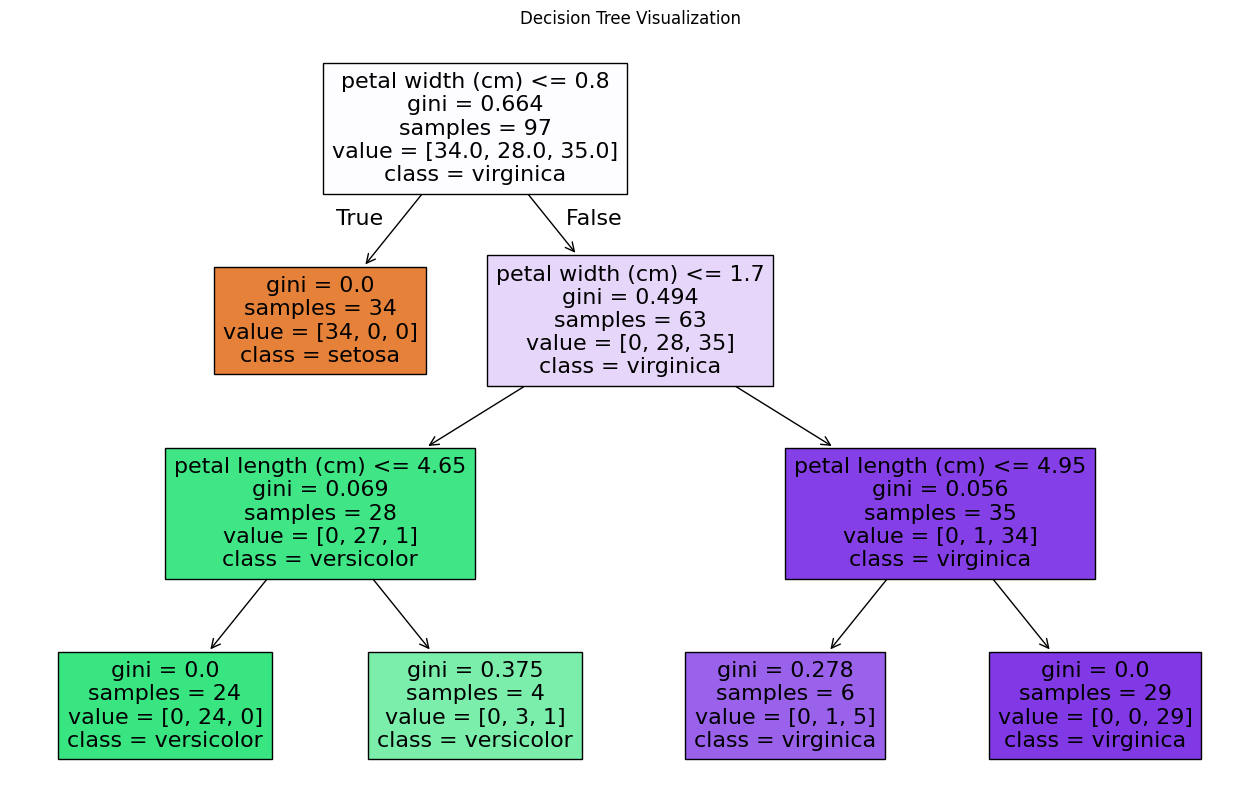

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iris = datasets.load_iris()
feature_names = iris.feature_names
class_names = iris.target_names

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=16)

tree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=4,  max_depth=3,max_features=None,splitter='best',  random_state=16)
tree_model.fit(X_train, y_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

plt.figure(figsize=(16,10))
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Decision Tree Visualization")
plt.show()

classification report  for test data

In [ ]:
actual =y_test
y_pred_test= tree_model.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.95      0.91        22
           2       0.92      0.80      0.86        15

    accuracy                           0.92        53
   macro avg       0.93      0.92      0.92        53
weighted avg       0.93      0.92      0.92        53



confusion matrix for test data

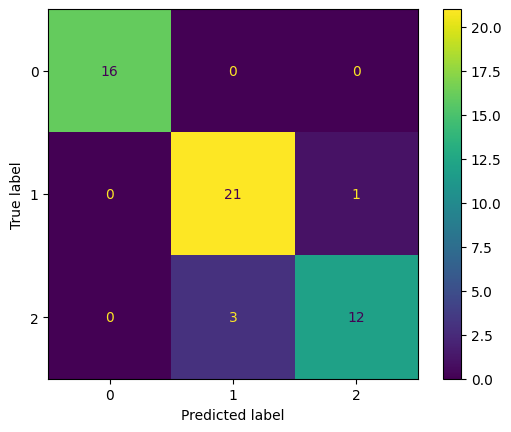

In [ ]:
actual =y_test
y_pred_test= tree_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()